# ***DSML Project***

Dataset link: https://www.kaggle.com/datasets/suraj520/agricultural-data-for-rajasthan-india-2018-2019/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
crop_production_df = pd.read_csv('crop_production_data.csv')
water_usage_df = pd.read_csv('water_usage_data.csv')
soil_analysis_df = pd.read_csv('soil_analysis_data.csv')
crop_price_df = pd.read_csv('crop_price_data.csv')

In [3]:
crop_production_df.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons)
0,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.152230
1,Kota,Gram,Rabi,16943.065614,45.818232,7763.013072
2,Jaipur,Wheat,Rabi,14297.539876,29.752629,4253.893981
3,Hanumangarh,Coriander,Rabi,19737.638447,42.026511,8295.040749
4,Hanumangarh,Citrus,Rabi,13591.576842,38.195933,5191.429648


In [5]:
water_usage_df.head()

,District,Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
0,Udaipur,Garlic,Tube Well,11609.330886,11335.919980
1,Bhilwara,Gram,Drip Irrigation,12648.406038,12091.900254
2,Udaipur,Guava,Canal Irrigation,10063.162448,9810.943169
3,Jodhpur,Barley,Sprinkler Irrigation,10110.539993,10754.217313
4,Alwar,Gram,Canal Irrigation,9320.451018,8695.537819


In [6]:
soil_analysis_df.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


In [7]:
crop_price_df.head()

,District,Crop,Market,Date,Price (INR/quintal)
0,Alwar,Barley,Alwar APMC Mandi,2018-09-05,2490.092421
1,Sri Ganganagar,Pomegranate,Padampur Mandi,2018-11-20,2348.904922
2,Kota,Maize,Ramganj Mandi,2018-04-06,2448.287513
3,Nagaur,Fenugreek,Didwana Mandi,2018-09-26,2714.419518
4,Nagaur,Gram,Didwana Mandi,2018-10-06,2883.356997


In [7]:
merged_df_1 = pd.merge(crop_production_df, water_usage_df, on=["District", "Crop"], how="inner")
merged_df_2 = pd.merge(merged_df_1, soil_analysis_df, on="District", how="inner")
merged_final = pd.merge(merged_df_2, crop_price_df, on=["District", "Crop"], how="inner")

In [8]:
merged_df = merged_final.sample(frac=0.005, random_state=42)

In [9]:
merged_df.shape

(45276, 18)

In [10]:
merged_df.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Market,Date,Price (INR/quintal)
8778405,Jaipur,Wheat,Rabi,16131.301182,41.462190,6688.390676,Canal Irrigation,16092.813681,15806.901430,Black lava soil,6.839961,1.880624,36.427911,19.714694,40.707979,Bassi Mandi,2018-04-13,3070.194713
2024649,Ajmer,Citrus,Rabi,16842.500100,35.450730,5970.789237,Tube Well,9142.721450,8469.260440,Nitrogenous,7.923385,0.936386,29.504528,16.985897,42.161315,Kishangarh Mandi,2018-04-09,2553.372517
4890792,Jaipur,Mustard,Kharif,14427.952798,26.354204,3802.372181,Tube Well,12358.597811,12684.561083,Nitrogenous,8.604928,2.163497,25.824377,28.264565,50.388888,Kisan Mandi,2018-10-10,2192.574775
3096810,Nagaur,Barley,Kharif,15633.052402,37.318974,5834.094766,Drip Irrigation,7608.361869,7927.147091,Black lava soil,7.424840,1.836652,24.787112,14.138831,42.321849,Didwana Mandi,2018-08-23,2444.069075
4968612,Bhilwara,Fenugreek,Kharif,19900.294597,33.908028,6747.797390,Drip Irrigation,8744.458063,8454.102753,Alkaline,7.524664,2.361223,28.173596,31.939839,40.900355,Bhilwara APMC Mandi,2019-03-29,1781.175314


In [11]:
merged_df.dtypes

District                                object
Crop                                    object
Season                                  object
Area (hectares)                        float64
Yield (quintals)                       float64
Production (metric tons)               float64
Irrigation Method                       object
Water Consumption (liters/hectare)     float64
Water Availability (liters/hectare)    float64
Soil Type                               object
pH Level                               float64
Organic Matter (%)                     float64
Nitrogen Content (kg/ha)               float64
Phosphorus Content (kg/ha)             float64
Potassium Content (kg/ha)              float64
Market                                  object
Date                                    object
Price (INR/quintal)                    float64
dtype: object

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45276 entries, 8778405 to 2833973
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             45276 non-null  object 
 1   Crop                                 45276 non-null  object 
 2   Season                               45276 non-null  object 
 3   Area (hectares)                      45276 non-null  float64
 4   Yield (quintals)                     45276 non-null  float64
 5   Production (metric tons)             45276 non-null  float64
 6   Irrigation Method                    45276 non-null  object 
 7   Water Consumption (liters/hectare)   45276 non-null  float64
 8   Water Availability (liters/hectare)  45276 non-null  float64
 9   Soil Type                            45276 non-null  object 
 10  pH Level                             45276 non-null  float64
 11  Organic Matter (%)       

In [13]:
merged_df.describe()

,Area (hectares),Yield (quintals),Production (metric tons),Water Consumption (liters/hectare),Water Availability (liters/hectare),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Price (INR/quintal)
count,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000,45276.000000
mean,15078.295061,37.667273,5681.186922,10526.002336,10510.275546,7.496725,1.993106,29.876325,19.701074,39.915914,2500.689589
std,2784.051261,8.280651,1644.649387,2854.443127,2929.825286,0.520090,0.520536,5.228062,5.055133,4.841452,296.431514
min,5276.197980,20.272936,1728.445956,4673.530139,4505.257189,5.889492,0.155817,11.994574,4.961838,24.116481,1323.279925
25%,13165.446591,30.999720,4491.574907,8172.130834,8133.959009,7.156975,1.631485,26.190877,16.201484,36.721561,2303.189573
50%,15178.891110,37.193350,5570.334123,10303.143064,10417.701688,7.506250,1.977863,29.818347,19.900408,39.804902,2499.817455
75%,16988.643806,44.016968,6778.919195,12716.654361,12926.585227,7.853516,2.351746,33.297256,23.039202,43.422252,2701.827036
max,20000.000000,60.429192,10834.530834,18631.091327,18489.171266,9.038430,3.764528,45.760284,35.588406,54.678290,3513.330472


In [14]:
merged_df.duplicated().sum()

np.int64(0)

In [15]:
# Check for missing values in each column
missing_values = merged_df.isnull().sum()
print(missing_values)

District                               0
Crop                                   0
Season                                 0
Area (hectares)                        0
Yield (quintals)                       0
Production (metric tons)               0
Irrigation Method                      0
Water Consumption (liters/hectare)     0
Water Availability (liters/hectare)    0
Soil Type                              0
pH Level                               0
Organic Matter (%)                     0
Nitrogen Content (kg/ha)               0
Phosphorus Content (kg/ha)             0
Potassium Content (kg/ha)              0
Market                                 0
Date                                   0
Price (INR/quintal)                    0
dtype: int64


In [16]:
# Converting an object type representing a date to a datetime type so that we can perform arthematic operations on days,weeks,years and extract info about months,dates etc
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
print(merged_df['Date'])

8778405   2018-04-13
2024649   2018-04-09
4890792   2018-10-10
3096810   2018-08-23
4968612   2019-03-29
             ...    
1796494   2019-03-13
5872836   2019-03-01
1601828   2018-05-28
6508988   2018-08-01
2833973   2018-06-24
Name: Date, Length: 45276, dtype: datetime64[ns]


In [17]:
# verifying if Date column is of type DateTime
merged_df.dtypes

District                                       object
Crop                                           object
Season                                         object
Area (hectares)                               float64
Yield (quintals)                              float64
Production (metric tons)                      float64
Irrigation Method                              object
Water Consumption (liters/hectare)            float64
Water Availability (liters/hectare)           float64
Soil Type                                      object
pH Level                                      float64
Organic Matter (%)                            float64
Nitrogen Content (kg/ha)                      float64
Phosphorus Content (kg/ha)                    float64
Potassium Content (kg/ha)                     float64
Market                                         object
Date                                   datetime64[ns]
Price (INR/quintal)                           float64
dtype: object

In [18]:
print(merged_df.columns)

Index(['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)',
       'Production (metric tons)', 'Irrigation Method',
       'Water Consumption (liters/hectare)',
       'Water Availability (liters/hectare)', 'Soil Type', 'pH Level',
       'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market',
       'Date', 'Price (INR/quintal)'],
      dtype='object')


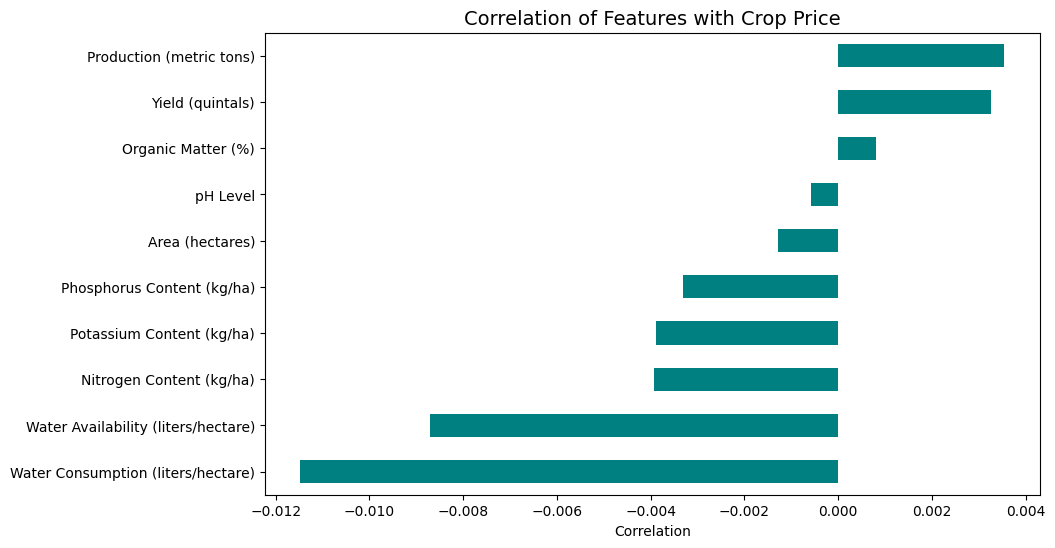

In [19]:
plt.figure(figsize=(10, 6))
merged_df_corr = merged_df.corr(numeric_only=True)['Price (INR/quintal)'].drop('Price (INR/quintal)').sort_values()
merged_df_corr.plot(kind='barh', color='teal')
plt.title("Correlation of Features with Crop Price", fontsize=14)
plt.xlabel("Correlation")
plt.show()

In [20]:
import seaborn as sns

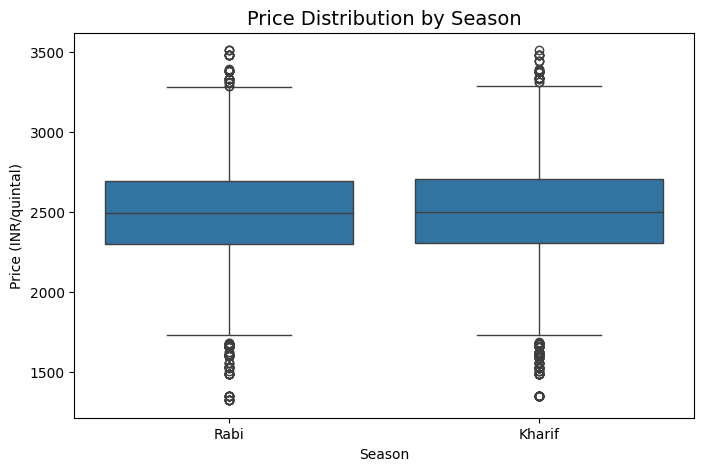

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Season', y='Price (INR/quintal)', data=merged_df)
plt.title("Price Distribution by Season", fontsize=14)
plt.show()

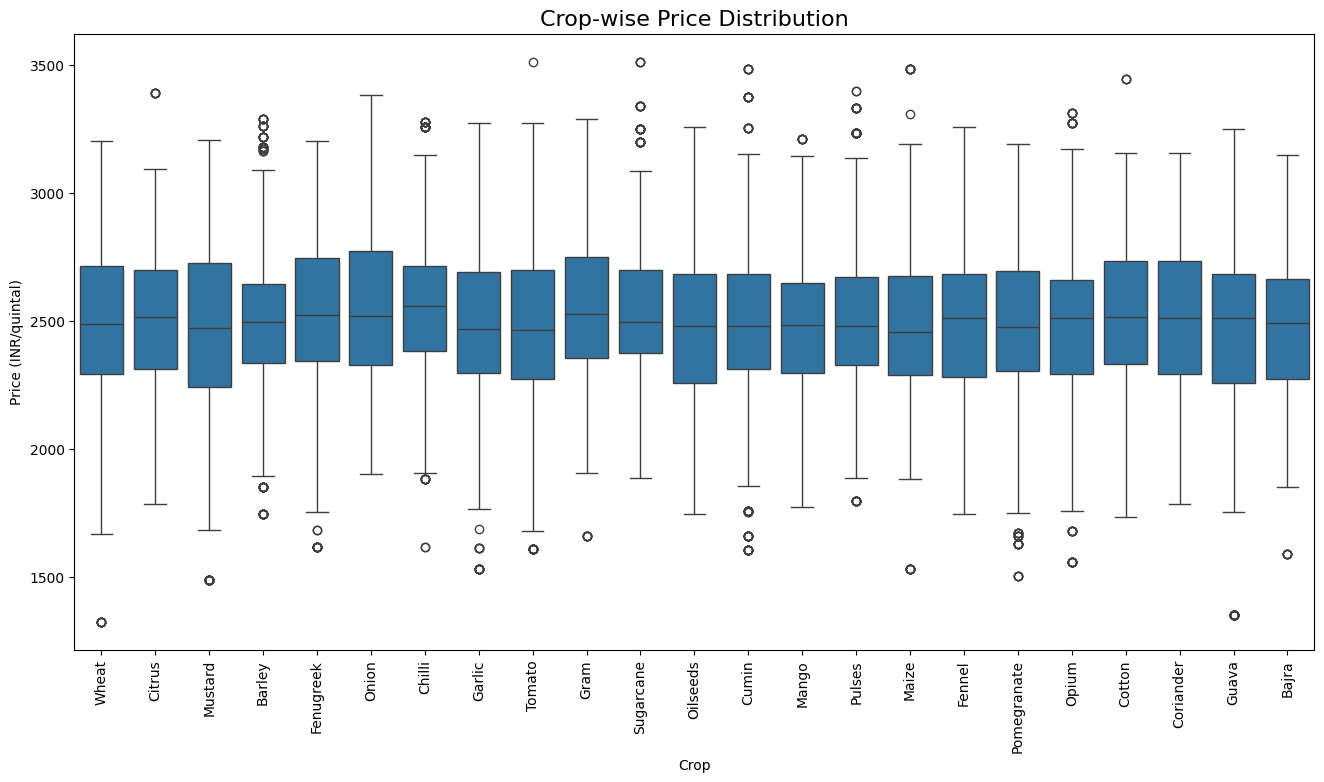

In [22]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Crop', y='Price (INR/quintal)', data=merged_df)
plt.xticks(rotation=90)
plt.title("Crop-wise Price Distribution", fontsize=16)
plt.xlabel("Crop")
plt.ylabel("Price (INR/quintal)")
plt.show()

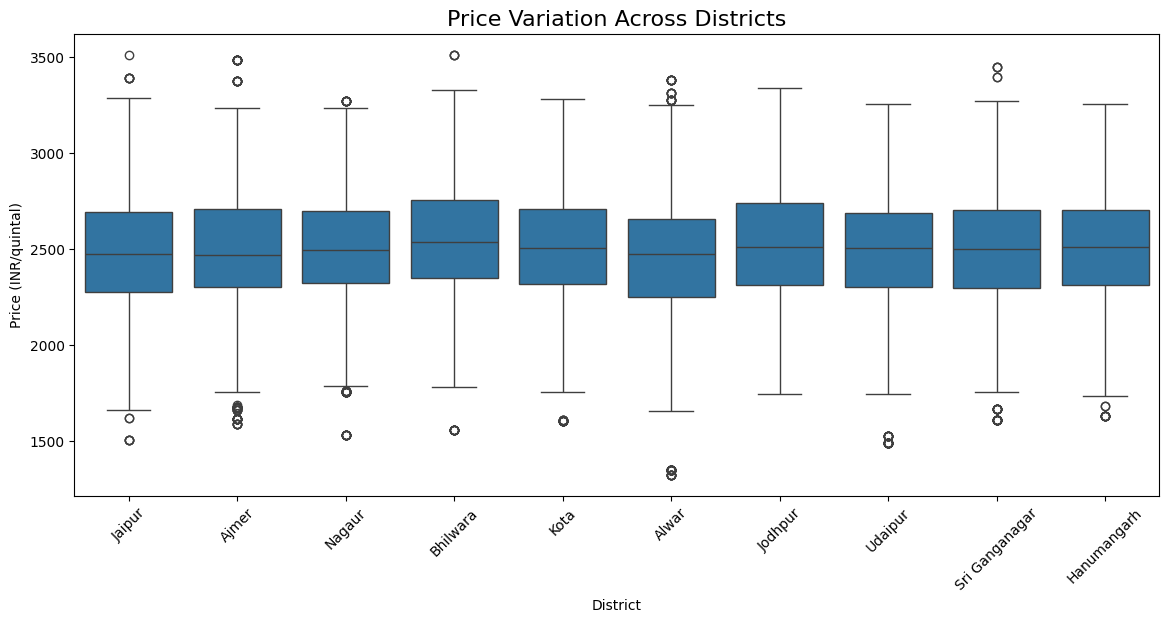

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='District', y='Price (INR/quintal)', data=merged_df)
plt.xticks(rotation=45)
plt.title("Price Variation Across Districts", fontsize=16)
plt.show()

In [24]:
print(merged_df.columns)


Index(['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)',
       'Production (metric tons)', 'Irrigation Method',
       'Water Consumption (liters/hectare)',
       'Water Availability (liters/hectare)', 'Soil Type', 'pH Level',
       'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market',
       'Date', 'Price (INR/quintal)'],
      dtype='object')


In [25]:
!pip install scikit-learn


In [29]:
print(merged_df.columns.tolist())


['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)', 'Production (metric tons)', 'Irrigation Method', 'Water Consumption (liters/hectare)', 'Water Availability (liters/hectare)', 'Soil Type', 'pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market', 'Date', 'Price (INR/quintal)']


In [30]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
merged_df['Day_of_Year'] = merged_df['Date'].dt.dayofyear


In [31]:
print(merged_df.columns.tolist())


['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)', 'Production (metric tons)', 'Irrigation Method', 'Water Consumption (liters/hectare)', 'Water Availability (liters/hectare)', 'Soil Type', 'pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market', 'Date', 'Price (INR/quintal)', 'Day_of_Year']


In [55]:
# standardising numerical values

from sklearn.preprocessing import MinMaxScaler

# Selecting the numerical columns
numerical_columns = [
    'Area (hectares)',
    'Yield (quintals)',
    'Production (metric tons)',
    'Water Consumption (liters/hectare)',
    'Water Availability (liters/hectare)',
    'pH Level',
    'Organic Matter (%)',
    'Nitrogen Content (kg/ha)',
    'Phosphorus Content (kg/ha)',
    'Potassium Content (kg/ha)',
    'Price (INR/quintal)',
    'Day_of_Year'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])


In [56]:
print(merged_df[numerical_columns].head())


         Area (hectares)  Yield (quintals)  Production (metric tons)  \
8778405         0.737249          0.527670                  0.544685   
2024649         0.785551          0.377968                  0.465880   
4890792         0.621562          0.151440                  0.227752   
3096810         0.703409          0.424493                  0.450869   
4968612         0.993228          0.339551                  0.551209   

         Water Consumption (liters/hectare)  \
8778405                            0.818143   
2024649                            0.320199   
4890792                            0.550602   
3096810                            0.210268   
4968612                            0.291665   

         Water Availability (liters/hectare)  pH Level  Organic Matter (%)  \
8778405                             0.808189  0.301838            0.477956   
2024649                             0.283469  0.645898            0.216301   
4890792                             0.584908  0.86

In [57]:
merged_df.head()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Market,Date,Price (INR/quintal),Day_of_Year
8778405,4,22,1,0.737249,0.527670,0.544685,0,0.818143,0.808189,1,0.301838,0.477956,0.723614,0.481701,0.542883,2,2018-04-13,0.797660,0.280220
2024649,0,3,1,0.785551,0.377968,0.465880,3,0.320199,0.283469,5,0.645898,0.216301,0.518572,0.392602,0.590437,10,2018-04-09,0.561673,0.269231
4890792,4,14,0,0.621562,0.151440,0.227752,3,0.550602,0.584908,5,0.862334,0.556343,0.409581,0.760866,0.859648,9,2018-10-10,0.396929,0.774725
3096810,7,1,0,0.703409,0.424493,0.450869,1,0.210268,0.244702,1,0.487576,0.465772,0.378862,0.299642,0.595690,5,2018-08-23,0.511764,0.642857
4968612,2,8,0,0.993228,0.339551,0.551209,1,0.291665,0.282385,0,0.519277,0.611134,0.479155,0.880869,0.549178,3,2019-03-29,0.209080,0.239011


In [58]:
print(merged_df.columns)


Index(['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)',
       'Production (metric tons)', 'Irrigation Method',
       'Water Consumption (liters/hectare)',
       'Water Availability (liters/hectare)', 'Soil Type', 'pH Level',
       'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market',
       'Date', 'Price (INR/quintal)', 'Day_of_Year'],
      dtype='object')


**The pandas-profiling library, named "ydata-profiling", is a Python library which is designed to automate the process of Exploratory Data Analysis (EDA). It generates a comprehensive and interactive report that provides a detailed overview of a dataset, making it easier to understand the data's structure, contents, and potential issues without writing extensive code.**

!pip install ydata-profiling

!pip install --upgrade bottleneck

from ydata_profiling import ProfileReport #not compatible anymore with current version of python

profile = ProfileReport(merged_df, title="Merged DataFrame Profiling Report", explorative=True)
profile.to_notebook_iframe()

In [59]:
print(merged_df['District'].unique())

[4 0 7 2 6 1 5 9 8 3]


In [60]:
print(merged_df['Crop'].unique())

[22  3 14  1  8 16  2  9 21 10 20 15  6 13 19 12  7 18 17  5  4 11  0]


In [61]:
print(merged_df['Season'].unique())

[1 0]


In [62]:
print(merged_df['Irrigation Method'].unique())

[0 3 1 2]


In [63]:
print(merged_df['Soil Type'].unique())

[1 5 0 6 2 4 7 3]


In [64]:
print(merged_df['Market'].unique())

[ 2 10  9  5  3 13 11  1  8 22 19 23  6  0 18  4 16 20 21 12 17 15 14  7]


In [65]:
!pip install scikit-learn


In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['District', 'Crop', 'Season', 'Irrigation Method', 'Soil Type', 'Market']

label_encoders = {}
mappings = {}

for col in categorical_columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in mappings.items():
    print(f"Mapping for {col}:")
    for category, encoded_value in mapping.items():
        print(f"  {category}: {encoded_value}")
    print()

Mapping for District:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9

Mapping for Crop:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9
  10: 10
  11: 11
  12: 12
  13: 13
  14: 14
  15: 15
  16: 16
  17: 17
  18: 18
  19: 19
  20: 20
  21: 21
  22: 22

Mapping for Season:
  0: 0
  1: 1

Mapping for Irrigation Method:
  0: 0
  1: 1
  2: 2
  3: 3

Mapping for Soil Type:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7

Mapping for Market:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9
  10: 10
  11: 11
  12: 12
  13: 13
  14: 14
  15: 15
  16: 16
  17: 17
  18: 18
  19: 19
  20: 20
  21: 21
  22: 22
  23: 23



In [67]:
# check whether all categorical data is label encoded
print(merged_df['Market'].unique())
print(merged_df['Soil Type'].unique())
print(merged_df['Irrigation Method'].unique())
print(merged_df['Season'].unique())
print(merged_df['Crop'].unique())
print(merged_df['District'].unique())

[ 2 10  9  5  3 13 11  1  8 22 19 23  6  0 18  4 16 20 21 12 17 15 14  7]
[1 5 0 6 2 4 7 3]
[0 3 1 2]
[1 0]
[22  3 14  1  8 16  2  9 21 10 20 15  6 13 19 12  7 18 17  5  4 11  0]
[4 0 7 2 6 1 5 9 8 3]


In [68]:
merged_df.shape

(45276, 19)

In [69]:
print(merged_df.columns)

Index(['District', 'Crop', 'Season', 'Area (hectares)', 'Yield (quintals)',
       'Production (metric tons)', 'Irrigation Method',
       'Water Consumption (liters/hectare)',
       'Water Availability (liters/hectare)', 'Soil Type', 'pH Level',
       'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Market',
       'Date', 'Price (INR/quintal)', 'Day_of_Year'],
      dtype='object')


# Spliting the Data into Training and Testing Sets (80:20)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# x is input
x = merged_df.drop(columns=['Price (INR/quintal)'])
# y is output
y = merged_df['Price (INR/quintal)']

In [72]:
merged_df.shape

(45276, 19)

In [73]:
# x_train and y_train are the training data
# x_test and y_test are the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
print("x_train shape is: ", x_train.shape)
print("y_train shape is: ",y_train.shape)
print("x_test shape is: ",x_test.shape)
print("y_test shape is: ",y_test.shape)

x_train shape is:  (36220, 18)
y_train shape is:  (36220,)
x_test shape is:  (9056, 18)
y_test shape is:  (9056,)



# Feature Selection with Random Forest



In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

In [102]:
# Drop the 'Date' column from training and testing features
if 'Date' in x_train.columns:
    x_train = x_train.drop(columns=['Date'])
if 'Date' in x_test.columns:
    x_test = x_test.drop(columns=['Date'])


In [105]:
# Fit the model to the training data
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# Get feature importances from the trained model
importances = model.feature_importances_

In [110]:
# Create a DataFrame to display the features and their importance scores
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

In [111]:
# Sort the features by their importance score in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [112]:
# Set a threshold for feature importance
threshold = 0.05  # Example threshold, you can adjust this value

In [113]:
# Select features with importance above the threshold
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

In [114]:
print(f"Selected features with importance above {threshold}:")
print(selected_features)

Selected features with importance above 0.05:
16    Day_of_Year
1            Crop
15         Market
0        District
Name: Feature, dtype: object


In [119]:
# Select only the features that meet the threshold from the training and testing datasets
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# ***Applying Models***

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 1.  XGBoost Regressor

In [117]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/47/78/27daa8e0287ce205908f089564472af42eb4646146a51d2fbb76ef8f3880/xgboost-3.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.1/150.0 MB 508.4 kB/s eta 0:04:55
   ---------------------------------------- 0.2/150.0 MB 833.5 kB/s eta 0:03:00
   ---------------------------------------- 0.2/150.0 MB 1.0 MB/s eta 0:02:25
   ---------------------------------------- 0.3/150.0 MB 1.0 MB/s eta 0:02:25
   ---------------------------------------- 0.3/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:03
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:05
   -----------

In [126]:
from xgboost import XGBRegressor

In [127]:
param_grid = {
    'n_estimators': [1500, 1700],  # Number of trees
    'learning_rate': [0.01, 0.02],  # Lower learning rate for more precise boosting
    'max_depth': [12,13]  # Deeper trees to capture more complex patterns
}

In [128]:
# Initialize the XGBRegressor
model = XGBRegressor(random_state=42)

In [129]:
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

In [130]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train_selected, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [12, 13],
                         'n_estimators': [1500, 1700]},
             scoring='r2', verbose=2)

In [131]:
# Using the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_selected)

# Evaluating the model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R-squared: {r2}")

Test Set Mean Squared Error: 0.00040222944750067523
Test Set R-squared: 0.9777227672739016


# 2. Light Gradient Boosting Machine Regressor

In [132]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 3.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.8 MB/s eta 0:00:00


In [133]:
!pip install --upgrade pandas
!pip install --upgrade dask

  Obtaining dependency information for dask from https://files.pythonhosted.org/packages/20/cb/a68c59dd229bae7c439631dba66b0286d551efae67e09e0bbf813635b0d3/dask-2025.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1 from https://files.pythonhosted.org/packages/a2/58/1f37bf81e3c689cc74ffa42102fa8915b59085f54a6e4a80bc6265c0f6bf/click-8.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle>=3.0.0 from https://files.pythonhosted.org/packages/7e/e8/64c37fadfc2816a7701fa8a6ed8d87327c7d54eacfbfb6edab14a2f2be75/cloudpickle-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec>=2021.09.0 from https://files.pythonhosted.org/packages/44/4b/e0cfc1a6f17e990f3e64b7d941ddc4acdc7b19d6edd51abf495f32b1a9e4/fsspec-2025.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for partd>=1.4.0 from https://files.pythonhosted.org/packages/71/e7/40fb618334dcdf7c5a316c0e7343c5cd82d3d866edc100d98e29bc945ecd/partd-1.4.2-py3

In [134]:
import lightgbm as lgb

In [135]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [1000, 1500],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05],  # Learning rate
    'max_depth': [10, 15],  # Maximum depth of trees
    'num_leaves': [50, 100],  # Number of leaves in one tree
}

In [136]:
# Initialize the LightGBM Regressor
model = lgb.LGBMRegressor(random_state=42)

In [137]:
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

In [138]:
# fitting model
grid_search.fit(x_train_selected, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 36220, number of used features: 4
[LightGBM] [Info] Start training from score 0.537426


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [10, 15],
                         'n_estimators': [1000, 1500],
                         'num_leaves': [50, 100]},
             scoring='r2', verbose=2)

In [139]:
# Using the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_selected)

# Evaluating the model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R-squared: {r2}")

Test Set Mean Squared Error: 0.001028936642999232
Test Set R-squared: 0.9430129713303355


# 3. Gradient Boosting Regressor


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [141]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [900, 1000],  # Number of trees
    'learning_rate': [0.01, 0.02],  # Learning rate
    'max_depth': [15, 20]  # Depth of each tree
}

In [142]:
# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

In [143]:
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3, scoring='r2')


In [144]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train_selected, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [15, 20],
                         'n_estimators': [900, 1000]},
             scoring='r2', verbose=3)

In [145]:
# Using the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_selected)

# Evaluating the model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R-squared: {r2}")

Test Set Mean Squared Error: 0.0003002580922278952
Test Set R-squared: 0.9833703886176959


# Visualization of results

In [146]:
%matplotlib inline

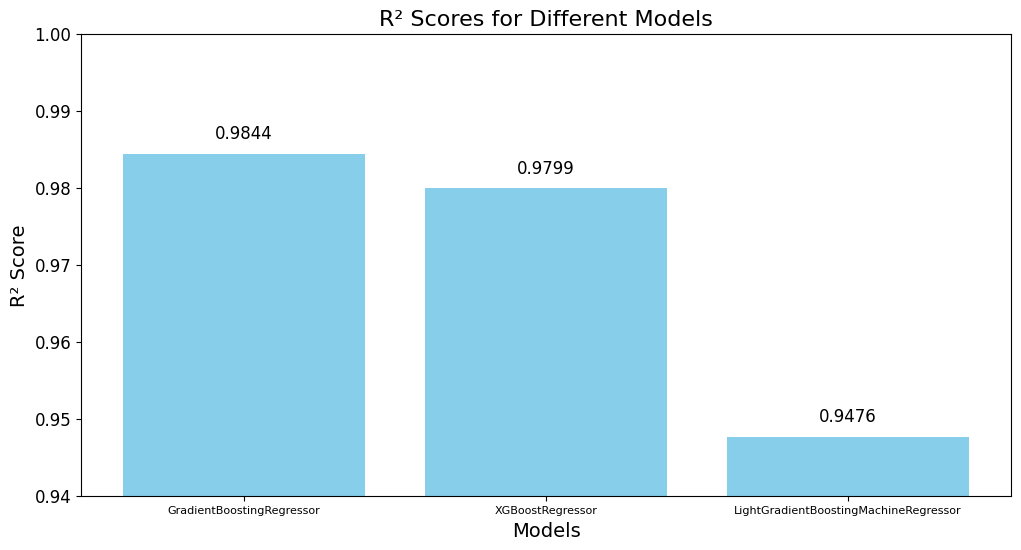

In [147]:
models = ['GradientBoostingRegressor', 'XGBoostRegressor', 'LightGradientBoostingMachineRegressor']
r2_scores = [0.9844, 0.9799, 0.9476]  # R² scores

plt.figure(figsize=(12, 6))
bars = plt.bar(models, r2_scores, color='skyblue')
plt.title('R² Scores for Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0.94, 1)  

plt.xticks(fontsize=8, rotation=0, ha='center')
plt.yticks(fontsize=12)

# Adding the value on top of the bars with four decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.4f}", ha='center', fontsize=12)

plt.show()

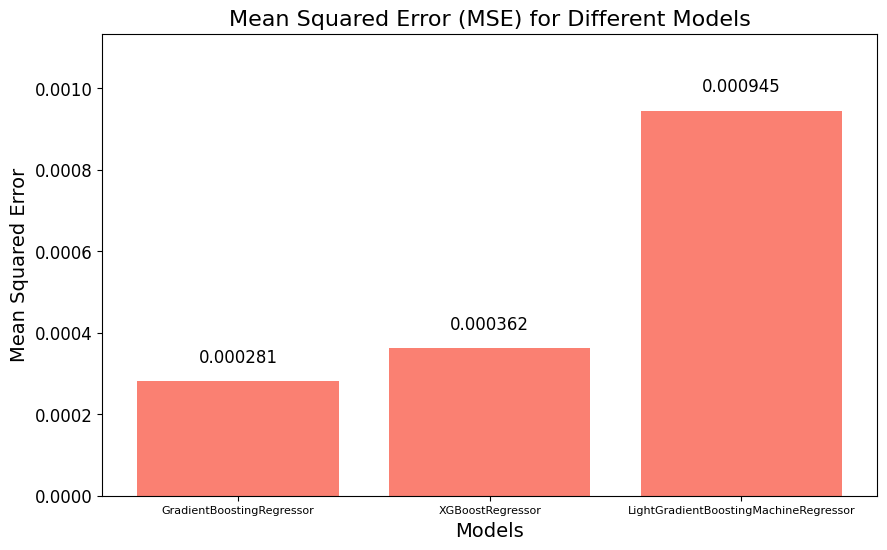

In [148]:
models = ['GradientBoostingRegressor', 'XGBoostRegressor', 'LightGradientBoostingMachineRegressor']
mse_values = [0.000281, 0.000362, 0.000945]  # MSE values

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color='salmon')
plt.title('Mean Squared Error (MSE) for Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.ylim(0, max(mse_values) + max(mse_values) * 0.2)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(mse_values) * 0.05, f"{yval:.6f}", ha='center', fontsize=12)

plt.show()